# Model Builder

### This Notebook contains VGG(1 block), VGG(3 blocks), VGG(16 blocks) and MLP model for Image Classification task.

In [278]:
# Importing the libraries
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Model
from keras.optimizers import SGD,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

## VGG(1 block) model
--------------------

In [279]:
# Define the VGG(1 block) model
def define_model_VGG():

	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	
	# compile model
	opt = SGD(learning_rate=0.0003, momentum=0.9)

	# opt = SGD(learning_rate=0.0003)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	
	return model

### VGG(1 block) model architecture.

In [280]:
model_1 = define_model_VGG()
model_1.summary()

Model: "sequential_112"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 flatten_117 (Flatten)       (None, 320000)            0         
                                                                 
 dense_571 (Dense)           (None, 128)               40960128  
                                                                 
 dense_572 (Dense)           (None, 64)                8256      
                                                                 
 dense_573 (Dense)           (None, 1)                 65        
                                                    

### Creating a function to train the models and show training summary.

In [281]:
# plot Training summary ans diagnostic learning curves
def summarize(history ,name : str ):
	
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.legend()
	
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig('./plots/'+ name + '_plot.jpg')
	pyplot.legend()
	pyplot.show()

In [282]:
# A function to train the model.
def Model_Trainer(model: Sequential, name : str, epochs : int):

	# create data generator.
	datagen = ImageDataGenerator(rescale=1.0/255.0)

	# prepare iterators.
	train_it = datagen.flow_from_directory('./Dataset_builder/Dataset/train/',class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('./Dataset_builder/Dataset/test',class_mode='binary', batch_size=64, target_size=(200, 200))
	
	# fit model.
	history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=epochs, verbose=1)
	
	# evaluate model.	
	loss, acc = model.evaluate(test_it, steps=len(test_it), verbose=1)
	print("____________________________________________________\n")
	print('Test Accuracy '+'> %.3f' % (acc * 100.0))
	print('Test Loss '+'> %.3f' % loss)
	print("____________________________________________________\n")

	# learning curves.
	summarize(history, name)

### Training the VGG(1 block) model.

Found 200 images belonging to 2 classes.
Found 66 images belonging to 2 classes.
Epoch 1/100
4/4 [==============================] - 3s 656ms/step - loss: 0.7680 - accuracy: 0.5250 - val_loss: 0.8058 - val_accuracy: 0.4242
Epoch 2/100
4/4 [==============================] - 2s 506ms/step - loss: 0.7493 - accuracy: 0.4700 - val_loss: 0.6651 - val_accuracy: 0.5758
Epoch 3/100
4/4 [==============================] - 2s 500ms/step - loss: 0.6702 - accuracy: 0.5300 - val_loss: 0.6805 - val_accuracy: 0.4545
Epoch 4/100
4/4 [==============================] - 2s 635ms/step - loss: 0.6298 - accuracy: 0.6150 - val_loss: 0.6354 - val_accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 2s 488ms/step - loss: 0.5914 - accuracy: 0.7300 - val_loss: 0.6058 - val_accuracy: 0.6818
Epoch 6/100
4/4 [==============================] - 2s 617ms/step - loss: 0.6075 - accuracy: 0.6550 - val_loss: 0.6502 - val_accuracy: 0.5758
Epoch 7/100
4/4 [==============================] - 2s 513ms/step - loss: 

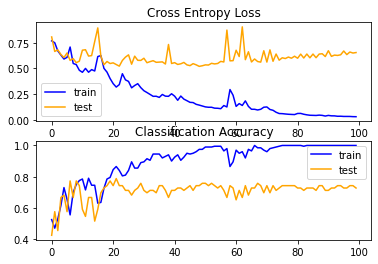

In [283]:
# Train the VGG(1 block) model.
Model_Trainer(model = model_1,name = 'VGG_1', epochs = 100)

## VGG(3 blocks) model.
---------------------

In [284]:
# Defining the VGG(3 block) model
def define_model_3VGG():

	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	
	# compile model
	opt = SGD(learning_rate=0.0003, momentum=0.9)
	
	# opt = SGD(learning_rate=0.0003)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

	return model

### VGG(3 blocks) model architecture.

In [285]:
model_3 = define_model_3VGG()
model_3.summary()

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 25, 25, 128)   

### Training the VGG(3 block) model.

Found 200 images belonging to 2 classes.
Found 66 images belonging to 2 classes.
Epoch 1/100
4/4 [==============================] - 4s 810ms/step - loss: 0.7276 - accuracy: 0.4850 - val_loss: 0.6619 - val_accuracy: 0.6212
Epoch 2/100
4/4 [==============================] - 3s 797ms/step - loss: 0.7137 - accuracy: 0.5250 - val_loss: 0.6649 - val_accuracy: 0.6212
Epoch 3/100
4/4 [==============================] - 3s 576ms/step - loss: 0.6801 - accuracy: 0.5650 - val_loss: 0.6677 - val_accuracy: 0.6212
Epoch 4/100
4/4 [==============================] - 3s 674ms/step - loss: 0.6663 - accuracy: 0.6000 - val_loss: 0.6490 - val_accuracy: 0.5758
Epoch 5/100
4/4 [==============================] - 3s 646ms/step - loss: 0.7107 - accuracy: 0.5050 - val_loss: 0.6334 - val_accuracy: 0.6364
Epoch 6/100
4/4 [==============================] - 2s 544ms/step - loss: 0.6576 - accuracy: 0.5850 - val_loss: 0.6307 - val_accuracy: 0.7424
Epoch 7/100
4/4 [==============================] - 3s 615ms/step - loss: 

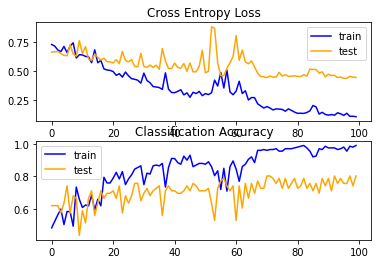

In [286]:
# Training the VGG(3 blocks) model
Model_Trainer(model = model_3,name = 'VGG_3', epochs = 100)

## VGG(16 blocks) model.
----------------------

In [287]:
def define_model_16VGG():
    # load model
    model = VGG16(include_top=False, input_shape=(200, 200, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    class2 = Dense(64, activation='relu', kernel_initializer='he_uniform')(class1)
    output = Dense(1, activation='sigmoid')(class2)
    
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(learning_rate=0.0003, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

### VGG(16 blocks) model architecture.

In [288]:
model_16 = define_model_16VGG()
model_16.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

### Training the VGG(16 block) model.

Found 200 images belonging to 2 classes.
Found 66 images belonging to 2 classes.
Epoch 1/50
4/4 [==============================] - 17s 4s/step - loss: 1.1421 - accuracy: 0.5150 - val_loss: 0.7183 - val_accuracy: 0.4242
Epoch 2/50
4/4 [==============================] - 16s 4s/step - loss: 0.7265 - accuracy: 0.5000 - val_loss: 0.8222 - val_accuracy: 0.4242
Epoch 3/50
4/4 [==============================] - 15s 4s/step - loss: 0.7483 - accuracy: 0.5000 - val_loss: 0.7128 - val_accuracy: 0.4545
Epoch 4/50
4/4 [==============================] - 15s 5s/step - loss: 0.6644 - accuracy: 0.6250 - val_loss: 0.6578 - val_accuracy: 0.6515
Epoch 5/50
4/4 [==============================] - 15s 4s/step - loss: 0.6601 - accuracy: 0.5900 - val_loss: 0.6440 - val_accuracy: 0.6212
Epoch 6/50
4/4 [==============================] - 15s 4s/step - loss: 0.6469 - accuracy: 0.6000 - val_loss: 0.6332 - val_accuracy: 0.6364
Epoch 7/50
4/4 [==============================] - 14s 4s/step - loss: 0.6205 - accuracy: 0.

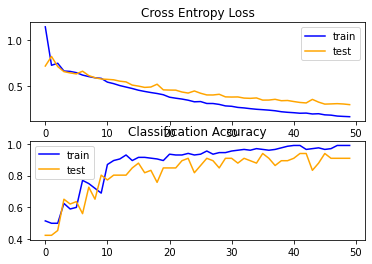

In [138]:
Model_Trainer(model = model_16,name = 'VGG_16', epochs = 50)

## MLP model.
------------

In [264]:
# Defining the VGG(3 block) model
def define_model_MLP():

	model = Sequential()
	model.add(Flatten(input_shape=(200, 200, 3)))
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	
	# compile model
	opt = SGD(learning_rate=0.0003, momentum=0.9)
	
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

	return model

### MLP model architecture.

In [275]:
model_MLP = define_model_MLP()
model_MLP.summary()

Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_116 (Flatten)       (None, 120000)            0         
                                                                 
 dense_564 (Dense)           (None, 128)               15360128  
                                                                 
 dense_565 (Dense)           (None, 1024)              132096    
                                                                 
 dense_566 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_567 (Dense)           (None, 512)               524800    
                                                                 
 dense_568 (Dense)           (None, 32)                16416     
                                                                 
 dense_569 (Dense)           (None, 16)             

### Training the MLP model.

Found 200 images belonging to 2 classes.
Found 66 images belonging to 2 classes.
Epoch 1/100
4/4 [==============================] - 3s 574ms/step - loss: 0.7001 - accuracy: 0.4800 - val_loss: 0.7257 - val_accuracy: 0.4545
Epoch 2/100
4/4 [==============================] - 2s 397ms/step - loss: 0.6830 - accuracy: 0.5700 - val_loss: 0.6852 - val_accuracy: 0.5152
Epoch 3/100
4/4 [==============================] - 2s 509ms/step - loss: 0.6546 - accuracy: 0.7150 - val_loss: 0.6730 - val_accuracy: 0.6061
Epoch 4/100
4/4 [==============================] - 2s 512ms/step - loss: 0.6607 - accuracy: 0.5750 - val_loss: 0.6512 - val_accuracy: 0.6061
Epoch 5/100
4/4 [==============================] - 2s 407ms/step - loss: 0.6307 - accuracy: 0.6600 - val_loss: 0.6792 - val_accuracy: 0.5606
Epoch 6/100
4/4 [==============================] - 2s 395ms/step - loss: 0.6014 - accuracy: 0.6800 - val_loss: 0.6653 - val_accuracy: 0.5909
Epoch 7/100
4/4 [==============================] - 2s 534ms/step - loss: 

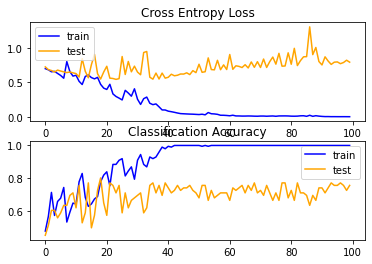

In [276]:
Model_Trainer(model = model_MLP,name = 'MLP', epochs = 100)